# Importações

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from datetime import datetime
import csv


## Ler Ficheiro e divisão dos dados

In [38]:
data_url = 'Datasets/total_treated.csv'

# Read the dataset using pandas
data = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')

# Dividir os dados em features e target
X = data.drop(columns=['label'])
y = data['label']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regressão Logística

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Matriz de Confusão (Teste):
[[3994    2]
 [   0 4783]]

Matriz de Confusão (Treino):
[[16021     1]
 [    1 19093]]

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3996
         1.0       1.00      1.00      1.00      4783

    accuracy                           1.00      8779
   macro avg       1.00      1.00      1.00      8779
weighted avg       1.00      1.00      1.00      8779


Acurácia (Teste): 0.9997721836200023

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16022
         1.0       1.00      1.00      1.00     19094

    accuracy                           1.00     35116
   macro avg       1.00      1.00      1.00     35116
weighted avg       1.00      1.00      1.00     35116


Acurácia (Treino): 0.9999430459050006

Tempo de execuçã

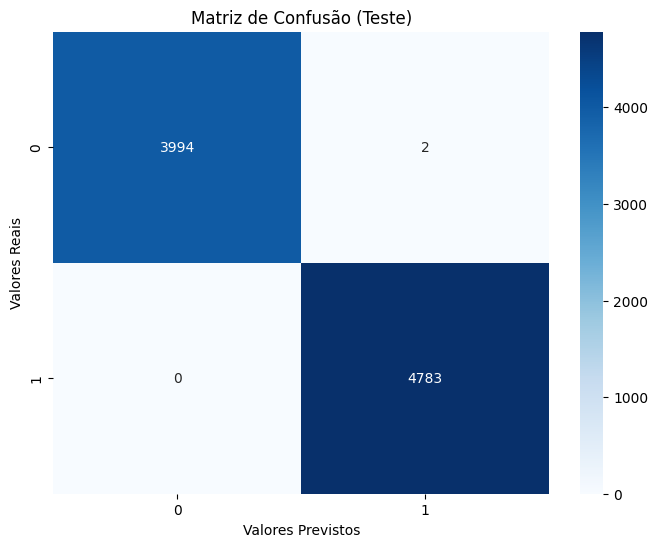

In [39]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix(matrix, title='Matriz de Confusão', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.show()

# Definir os hiperparâmetros para otimizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Criar o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)

# Criar o objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Treinar o modelo usando RandomizedSearchCV
start_time = datetime.now()
random_search.fit(X_train, y_train)
end_time = datetime.now()
execution_time = end_time - start_time

# Obter os melhores parâmetros
best_params = random_search.best_params_

# Obter as previsões para o conjunto de teste
y_pred = random_search.predict(X_test)

# Obter as previsões para o conjunto de treino
y_pred_train = random_search.predict(X_train)

# Calcular a matriz de confusão para o conjunto de teste e de treino
conf_matrix_test = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Calcular as métricas para o conjunto de teste
report_test = classification_report(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)

# Calcular as métricas para o conjunto de treino
report_train = classification_report(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Imprimir os resultados
print("Matriz de Confusão (Teste):")
print(conf_matrix_test)
print("\nMatriz de Confusão (Treino):")
print(conf_matrix_train)

print("\nRelatório de Classificação (Teste):")
print(report_test)
print("\nAcurácia (Teste):", accuracy_test)

print("\nRelatório de Classificação (Treino):")
print(report_train)
print("\nAcurácia (Treino):", accuracy_train)

print("\nTempo de execução:", execution_time)

# Plotar a matriz de confusão para o conjunto de teste
plot_confusion_matrix(conf_matrix_test, title='Matriz de Confusão (Teste)')

### Gerar Excel para regressão logistica

In [40]:
from openpyxl import Workbook, load_workbook
from openpyxl.styles import Border, Side, PatternFill

filename="Results/regressao_l.xlsx"

try:
    print("ww")
    # Carrega o arquivo Excel existente
    wb = load_workbook(filename)
    ws = wb.active

    # Encontra a próxima linha vazia na planilha
    next_row = ws.max_row + 2

    
except FileNotFoundError:
    print("ee")

ww
ee
